### Curve fitting

#### Import libraries  

In [5]:
from numpy import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

#### Parameters  

In [6]:
csv_in = 'vibration.csv'
%config InlineBackend.figure_formats = {'png', 'retina'}

#### Read data to be fitted from CSV file  

In [7]:
df = pd.read_csv(csv_in, delimiter=',', skiprows=0, header=0)
print(df.shape)
print(df.info())
display(df.head())

(200, 2)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x       200 non-null    float64
 1   y       200 non-null    float64
dtypes: float64(2)
memory usage: 3.2 KB
None


,x,y
0,-1.461658,-0.851052
1,-1.441970,-1.301433
2,-1.441574,-0.625615
3,-1.438549,-0.057903
4,-1.437801,-0.185529


#### Scatter plot of data  

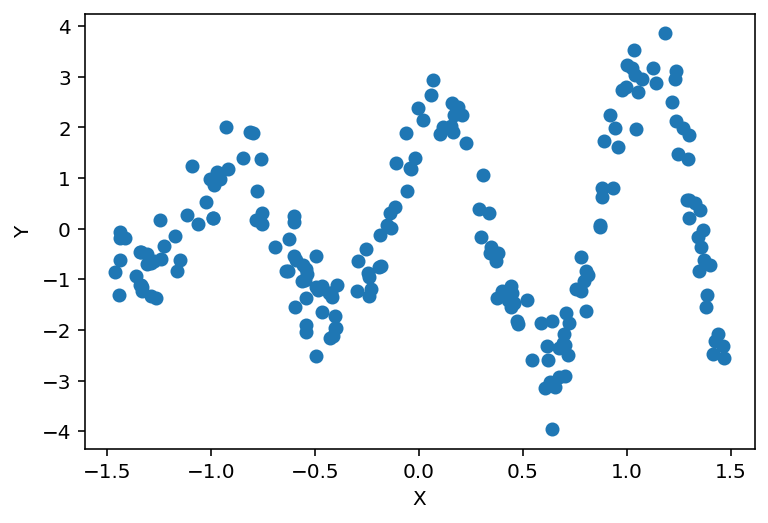

In [8]:
plt.scatter(df['x'],df['y'])
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

#### Definition of function for fitting  

In [9]:
def f(x, a, b, c):
    tot = a*np.exp(b*x) * np.sin(2*np.pi*x + c)
    return tot

#### Execute fitting  

In [10]:
popt, pcov = curve_fit(f, df['x'], df['y'])

In [11]:
print(popt)

[2.01374478 0.49162167 0.98982846]


In [12]:
y_reg = f(df['x'], *popt)  # *var: unpacking of list/tuple var

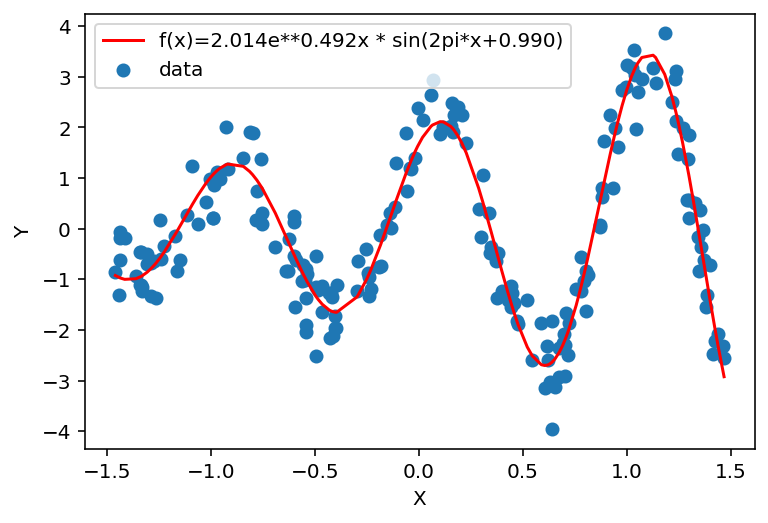

In [14]:
plt.scatter(df['x'], df['y'], label='data')
lbl = 'f(x)={0:.3f}e**{1:.3f}x * sin(2pi*x+{2:.3f})'.format(*popt)
plt.plot(df['x'], y_reg, color='red', label=lbl)
plt.legend()
plt.xlabel('X')
plt.ylabel('Y')
plt.show()